In [14]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (10, 10)

# Test code

In [28]:
df = pd.read_csv('s-output-400-800.csv')

df2 = df.copy()
df2.dropna(inplace=True, subset=['tabled_Pris eks omreg', 'tabled_Årsmodell'])

df3 = df2[df2['title'].str.lower().str.contains('toyota avensis')]

<IPython.core.display.Javascript object>


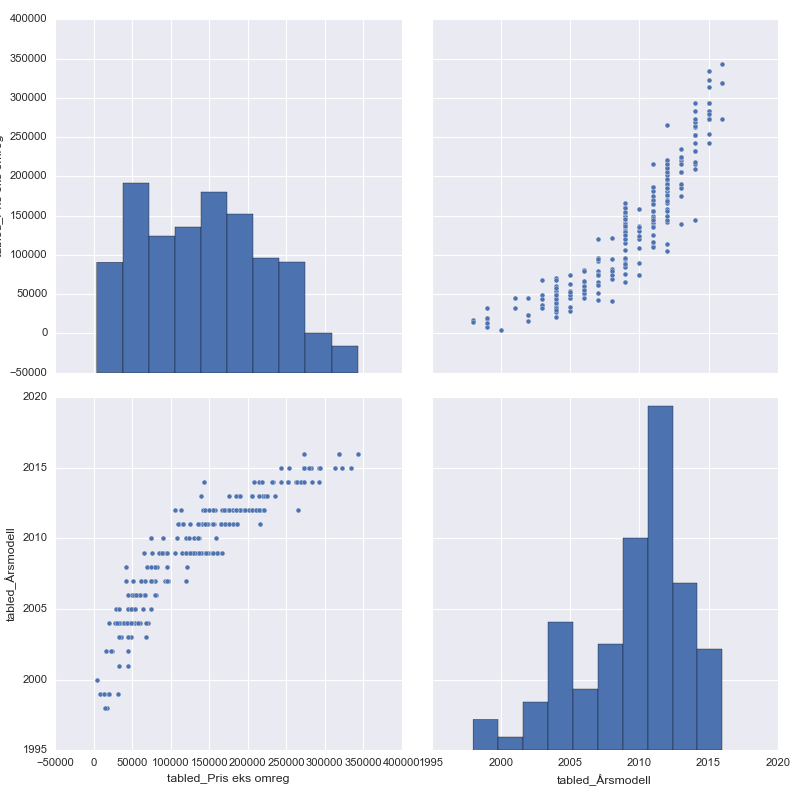

In [29]:
g = sns.pairplot(df3, vars=['tabled_Pris eks omreg', 'tabled_Årsmodell'], size=5)
sns.plt.show()

# Merge and analyze

In [2]:
files = [
    's-output-100.csv',
    's-output-100-200.csv',
    's-output-200-400.csv',
    's-output-400-800.csv',
]
frames = [pd.read_csv(fn, index_col='id') for fn in files]
merged_frames = pd.concat(frames)

In [34]:
columns = ['tabled_Pris eks omreg', 'tabled_Årsmodell', 'tabled_Effekt']

mf2 = merged_frames.copy()
mf2.dropna(inplace=True, subset=columns)

# Filter interesting subjects
bensin = mf2['tabled_Drivstoff'].str.lower().str.contains('bensin')
diesel = mf2['tabled_Drivstoff'].str.lower().str.contains('diesel')
octavia = mf2['title'].str.lower().str.contains('skoda octavia')
octavia_bensin = np.logical_and(
    octavia,
    bensin,
)
fabia_bensin = np.logical_and(
    mf2['title'].str.lower().str.contains('skoda fabia'),
    bensin,
)
avensis_bensin = np.logical_and(
    mf2['title'].str.lower().str.contains('toyota avensis'),
    bensin,
)
auris_bensin = np.logical_and(
    mf2['title'].str.lower().str.contains('toyota auris'),
    bensin,
)
auris_hybrid = np.logical_and(
    mf2['title'].str.lower().str.contains('toyota auris'),
    mf2['tabled_Drivstoff'].str.lower().str.contains('el'),
)
stasjonsvogn = mf2['tabled_Karosseri'] == 'Stasjonsvogn'

<IPython.core.display.Javascript object>


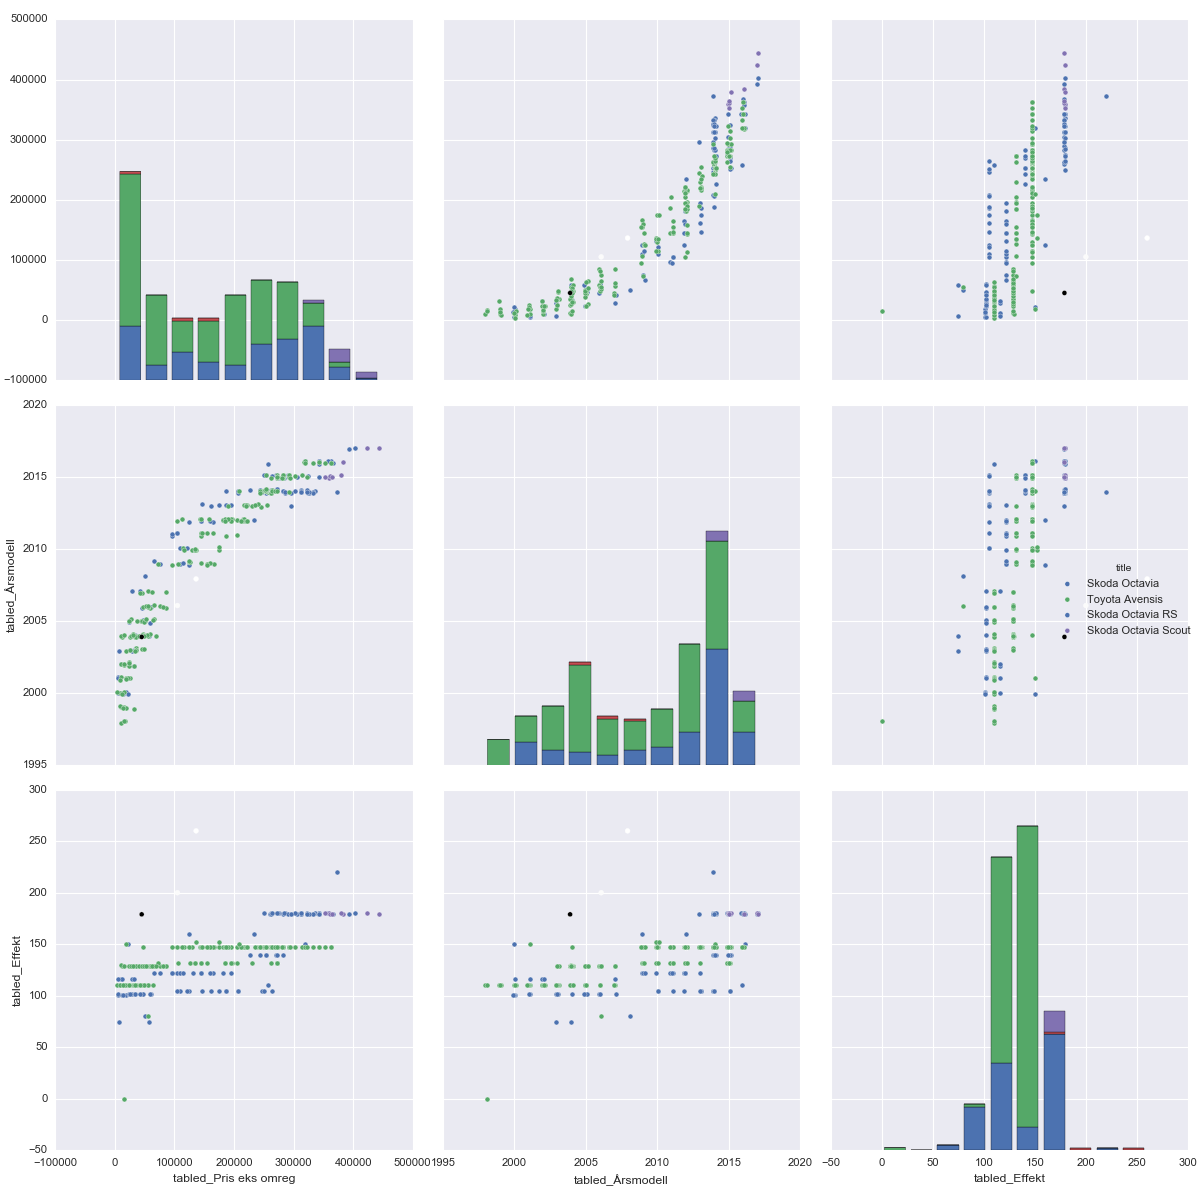

In [4]:
# Prepare keep
keep = np.logical_or.reduce((
    octavia_bensin,
    avensis_bensin,
    # fabia_bensin,
    # auris_bensin,
))
keep = np.logical_and(keep, stasjonsvogn)

# Add noise to Årsmodell for visual purposes
mf2['tabled_Årsmodell'] += np.random.uniform(size=mf2['tabled_Årsmodell'].shape)*0.25-0.125

g = sns.pairplot(mf2[keep], hue='title', vars=columns, size=5)
sns.plt.show()

<IPython.core.display.Javascript object>


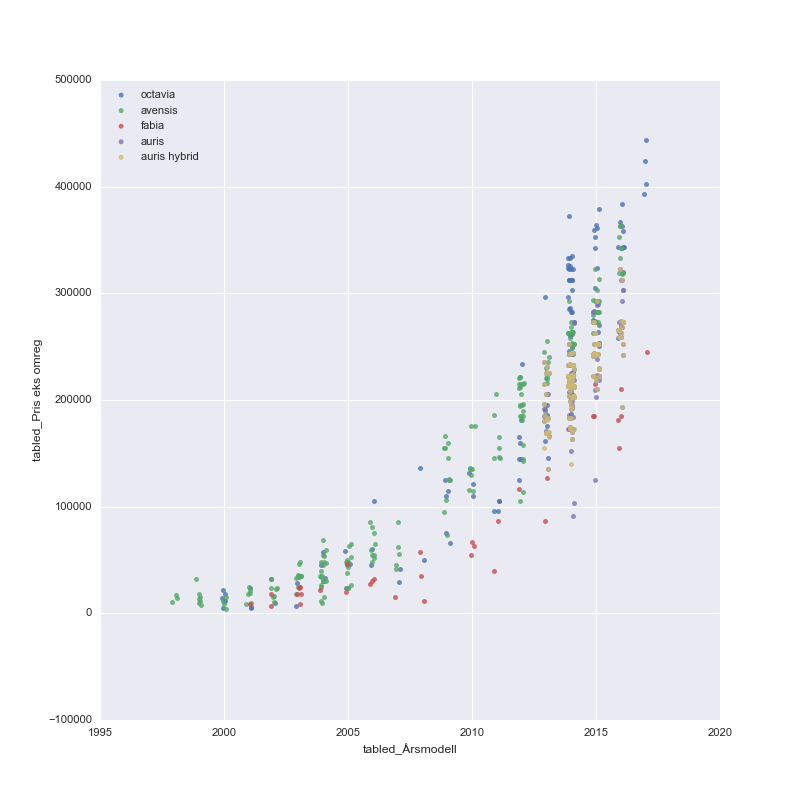

In [15]:
sns.plt.figure()
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[np.logical_and(stasjonsvogn, octavia_bensin)], fit_reg=False)
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[np.logical_and(stasjonsvogn, avensis_bensin)], fit_reg=False)
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[np.logical_and(stasjonsvogn, fabia_bensin)], fit_reg=False)
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[np.logical_and(stasjonsvogn, auris_bensin)], fit_reg=False)
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[np.logical_and(stasjonsvogn, auris_hybrid)], fit_reg=False)
sns.plt.legend(['octavia', 'avensis', 'fabia', 'auris', 'auris hybrid'], loc=2)
sns.plt.show()

In [35]:
midrange_hk_bensin = np.logical_and.reduce((120 < mf2['tabled_Effekt'], mf2['tabled_Effekt'] < 160, bensin))
midrange_hk_diesel = np.logical_and.reduce((100 < mf2['tabled_Effekt'], mf2['tabled_Effekt'] < 160, diesel))
midrange_hk = np.logical_or(midrange_hk_bensin, midrange_hk_diesel)
newer_car = mf2['tabled_Årsmodell'] > 2012

<IPython.core.display.Javascript object>


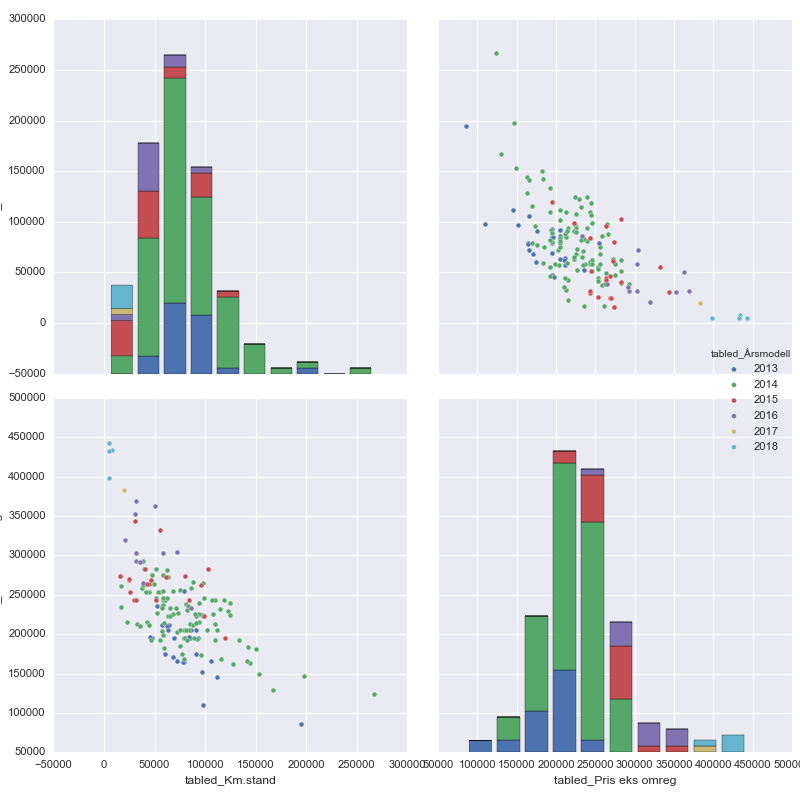

In [36]:
keep = np.logical_and.reduce((stasjonsvogn, octavia, midrange_hk, newer_car))

#sns.plt.figure()
# sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[keep], fit_reg=False)
g = sns.pairplot(mf2[keep], hue='tabled_Årsmodell', vars=['tabled_Km.stand', 'tabled_Pris eks omreg'], size=5)
sns.plt.show()